- NOTE!: HERE We ASSUME that the datasets contains already S21, NOT the output power. We keep track of input power in the dataset name.

Libraries and functions found on web to display content of a .h5 file

In [1]:
from h5py import *
import numpy as np
from h5utils import *
import matplotlib.pyplot as plt

In [2]:
filename = "INTERESSANTI/Trasmissione_tuttoOFF.h5";   # Change HERE!!!

Here you can see the content of the file

In [3]:
"""PRINT ALL the .h5 file directories"""
h5dump(filename,group = "/");

	 [ 0 ] - <HDF5 group "/" (2 members)>
		 [ 0 ] - <HDF5 group "/pump" (3 members)>
			 [ 0 ]- /pump/14.0GHz-20.0GHz_-10dBm : (2, 1000)
			 [ 1 ]- /pump/15.0GHz_16.0GHz_-20dBm_PreampIgnota : (2, 1000)
			 [ 2 ]- /pump/15.0GHz_16.0GHz_-20dBm_S21 : (2, 1000)
		 [ 1 ] - <HDF5 group "/signal" (2 members)>
			 [ 0 ]- /signal/1.0GHz_14.0GHz_-5dBm : (2, 1000)
			 [ 1 ]- /signal/1.0GHz_14.0GHz_0dBm : (2, 1000)


In [4]:
"""PRINT ALL the dataets or groups in the Selected Group"""
group = "/"
datasets = getDatasets(filename,group)
groups = getGroups(filename,group)

Datasets in  / :

Groups in  / :

[0] pump

[1] signal



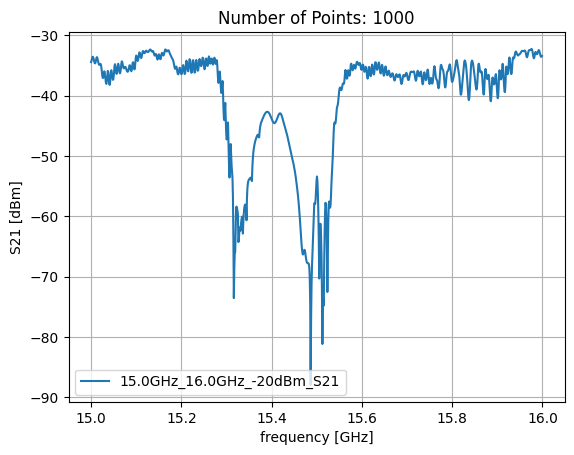

In [8]:
"""Plot a specific dataset from a specific group"""
group = "/pump/"
dataset_index = 2   #Selected from the ABOVE (getDatasets(...) method) list!

fmin = 15e9
fmax = 16e9

fig, ax = plotDatasetSpectrum(filename, group, dataset_index, fmin, fmax)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


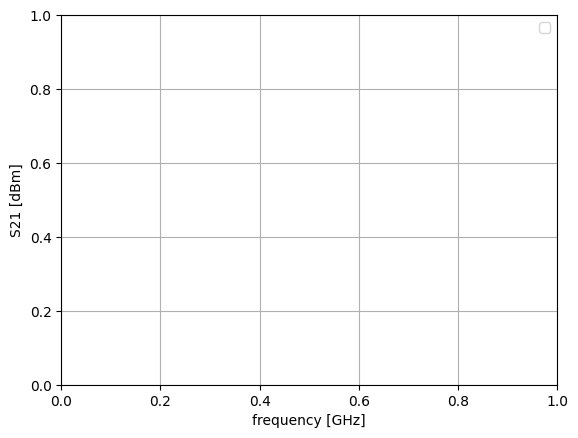

In [6]:
"""Plot ALL datasets in a specific group"""
group = "/"

fig, ax = plotAllDatasetsSpectrum(filename, group)

In [7]:
"""GET a dataset value"""
group = "/-10-0.4/"
dataset_index = 0   #Selected from the ABOVE (getDatasets(...) method) list!

xs, ys = getDatasetValue(filename,group,dataset_index)

group = "/Off/"

xsoff, ysoff = getDatasetValue(filename,group,dataset_index)

KeyError: "Unable to open object (object '-10-0.4' doesn't exist)"

In [ ]:
"""DELETE a dataset"""
full_dataset_path = "/to/delete/datasetname"
deleteDataset(filename, full_dataset_path)

In [ ]:
"""Save a dataset"""
filename_save = "save.h5"
full_dataset_path = "/group/datasetname"

mat = [xs1, ys1]
hf = h5py.File(filename_save, 'a')
hf.create_dataset(full_dataset_path, data = mat)
hf.close()